In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [31]:
import io

In [32]:
from google.colab import files
uploaded = files.upload()

Saving CELH.csv to CELH.csv


In [33]:
df = pd.read_csv(io.BytesIO(uploaded['CELH.csv']))
print(df)

          Date       Open       High        Low      Close  Adj Close
0     2/8/2023  32.756668  33.290001  32.296665  32.470001  32.470001
1     2/9/2023  32.973331  33.526669  31.889999  32.136665  32.136665
2    2/10/2023  31.826668  32.743332  31.173332  32.376667  32.376667
3    2/13/2023  32.623333  33.099998  31.723333  32.619999  32.619999
4    2/14/2023  32.176666  33.029999  31.870001  32.060001  32.060001
..         ...        ...        ...        ...        ...        ...
246   2/1/2024  50.000000  51.770000  49.560001  51.099998  51.099998
247   2/2/2024  51.570000  53.790001  50.900002  53.349998  53.349998
248   2/5/2024  52.540001  53.230000  50.290001  53.209999  53.209999
249   2/6/2024  53.169998  56.709999  53.049999  55.799999  55.799999
250   2/7/2024  55.799999  57.869999  55.380001  57.770000  57.770000

[251 rows x 6 columns]


In [34]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [35]:
data_training = data_training.drop(['Date'], axis = 1)

In [36]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.10876941, 0.10505177, 0.12433007, 0.11153608, 0.11153608],
       [0.11565343, 0.11218247, 0.11125399, 0.10091352, 0.10091352],
       [0.07922058, 0.08858087, 0.08821003, 0.10856176, 0.10856176],
       [0.10453296, 0.09932706, 0.10589496, 0.11631613, 0.11631613],
       [0.09034105, 0.09721802, 0.11061097, 0.09847043, 0.09847043],
       [0.09129433, 0.08124938, 0.1008575 , 0.10356922, 0.10356922],
       [0.08451605, 0.09500862, 0.0904609 , 0.07329513, 0.07329513],
       [0.06142768, 0.06086174, 0.07749196, 0.08423627, 0.08423627],
       [0.05803859, 0.04730341, 0.01125405, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.02262591, 0.02262591],
       [0.02467705, 0.02982826, 0.01811363, 0.05173145, 0.05173145],
       [0.02033471, 0.03796327, 0.04308682, 0.05481205, 0.05481205],
       [0.05073082, 0.03394598, 0.04308682, 0.03303592, 0.03303592],
       [0.05888585, 0.05624185, 0.04565917, 0.04132145, 0.04132145],
       [0.89218388, 0.87536411, 0.

In [37]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [38]:
x_train.shape

(43, 20, 5)

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [40]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [41]:
regressorGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 20, 60)            12060     
                                                                 
 dropout_4 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_5 (GRU)                 (None, 20, 60)            21960     
                                                                 
 dropout_5 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_6 (GRU)                 (None, 20, 80)            34080     
                                                                 
 dropout_6 (Dropout)         (None, 20, 80)            0         
                                                                 
 gru_7 (GRU)                 (None, 120)              

In [42]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
2/2 [==============================] - 6s 46ms/step - loss: 0.6209
Epoch 2/50
2/2 [==============================] - 0s 50ms/step - loss: 0.4857
Epoch 3/50
2/2 [==============================] - 0s 46ms/step - loss: 0.3397
Epoch 4/50
2/2 [==============================] - 0s 51ms/step - loss: 0.1839
Epoch 5/50
2/2 [==============================] - 0s 50ms/step - loss: 0.0412
Epoch 6/50
2/2 [==============================] - 0s 50ms/step - loss: 0.0727
Epoch 7/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0882
Epoch 8/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0293
Epoch 9/50
2/2 [==============================] - 0s 50ms/step - loss: 0.0217
Epoch 10/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0293
Epoch 11/50
2/2 [==============================] - 0s 46ms/step - loss: 0.0267
Epoch 12/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0269
Epoch 13/50
2/2 [==============================] - 0s 42ms/st

In [43]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
14,3/1/2023,29.873333,30.250000,28.876667,29.593332,29.593332
15,3/2/2023,28.280001,32.296665,28.006666,31.469999,31.469999
16,3/3/2023,31.293333,31.666668,29.990000,31.593332,31.593332
17,3/6/2023,30.666668,30.830000,29.206667,29.463333,29.463333
18,3/7/2023,29.570000,30.333332,29.423332,29.730000,29.730000


In [44]:
past_20_days = data_testing.tail(20)

In [45]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-45-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,65.826668,66.150002,63.820000,64.739998,64.739998
1,64.853333,66.786667,63.500000,65.786667,65.786667
2,65.743332,67.563332,65.736664,66.779999,66.779999
3,66.483330,68.713333,65.886665,68.419998,68.419998
4,68.333336,68.949997,67.006668,67.209999,67.209999


In [46]:
inputs = scaler.transform(df)
inputs

array([[ 1.15950013e+00,  1.09510907e+00,  1.13794216e+00,
         1.13989803e+00,  1.13989803e+00],
       [ 1.12857443e+00,  1.11429151e+00,  1.12765277e+00,
         1.17325268e+00,  1.17325268e+00],
       [ 1.15685230e+00,  1.13769208e+00,  1.19957123e+00,
         1.20490762e+00,  1.20490762e+00],
       [ 1.18036420e+00,  1.17234110e+00,  1.20439441e+00,
         1.25717018e+00,  1.25717018e+00],
       [ 1.23914431e+00,  1.17947168e+00,  1.24040737e+00,
         1.21861062e+00,  1.21861062e+00],
       [ 1.24147435e+00,  1.16330214e+00,  1.21661322e+00,
         1.19524127e+00,  1.19524127e+00],
       [ 1.16871431e+00,  1.13799344e+00,  1.20150065e+00,
         1.21329947e+00,  1.21329947e+00],
       [ 1.19286154e+00,  1.17595674e+00,  1.21779197e+00,
         1.20724459e+00,  1.20724459e+00],
       [ 1.20069910e+00,  1.15647292e+00,  1.22272239e+00,
         1.22190358e+00,  1.22190358e+00],
       [ 1.22092781e+00,  1.17525358e+00,  1.17642030e+00,
         1.17505839e+00

In [47]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((148, 20, 5), (148,))

In [48]:
x_test.shape

(148, 20, 5)

In [49]:
y_pred = regressorGRU.predict(x_test)

5/5 [==============================] - 1s 17ms/step


In [50]:
scaler.scale_

array([0.03177293, 0.03012956, 0.03215434, 0.03186743, 0.03186743])

In [51]:
scale = 1 / 0.00911079
scale

109.75996593050657

In [52]:
y_pred = y_pred * scale
y_test = y_test * scale

In [53]:
y_pred.shape

(148, 1)

In [54]:
y_test.shape

(148,)

In [55]:
y_pred[78:]

array([[65.18005 ],
       [65.18547 ],
       [65.466774],
       [65.9059  ],
       [66.40461 ],
       [66.94753 ],
       [67.43582 ],
       [67.82314 ],
       [68.04639 ],
       [68.117134],
       [67.99908 ],
       [67.784676],
       [67.636314],
       [67.493164],
       [67.440674],
       [67.53827 ],
       [67.80508 ],
       [68.23176 ],
       [68.47082 ],
       [68.34233 ],
       [67.91715 ],
       [67.37117 ],
       [66.83462 ],
       [66.44979 ],
       [66.30986 ],
       [66.311295],
       [66.41892 ],
       [66.527885],
       [66.4781  ],
       [66.11839 ],
       [65.669556],
       [65.311905],
       [65.05466 ],
       [64.91492 ],
       [66.01908 ],
       [68.39025 ],
       [71.37807 ],
       [74.60667 ],
       [77.70045 ],
       [80.31858 ],
       [81.9672  ],
       [82.71125 ],
       [83.10038 ],
       [83.49253 ],
       [83.997215],
       [84.466835],
       [84.913086],
       [85.41165 ],
       [86.13763 ],
       [87.26518 ],


In [56]:
y_test[78:]

array([ 62.08726287,  69.74790942,  71.91010507,  67.92284726,
        72.01472345,  72.47971532,  71.20099551,  71.14287458,
        70.64301224,  67.53923376,  68.55058193,  68.17857797,
        70.9917483 ,  68.60870286,  72.87494534,  70.73601759,
        75.68811218,  74.29314702,  64.4470683 ,  66.14426859,
        66.22564697,  64.2843255 ,  64.42382481,  67.49273631,
        71.53811506,  69.20155312,  70.64301224,  64.54007016,
        60.75043608,  59.86696023,  64.36570388,  63.3543557 ,
        64.06346526,  97.0658499 , 101.35534285,  98.48405507,
       102.62242173, 106.26094348, 110.43419456, 106.48182116,
        93.29945582, 101.44833425, 106.92354514, 104.58699714,
       107.34204305, 105.80757858, 110.51557293, 111.30604343,
       115.9558994 , 123.23292896, 127.26669468, 123.87229061,
       126.97606909, 129.55673477, 136.00843731, 136.26418197,
       128.27804286, 130.92844249, 131.78869228, 134.00899492,
       127.61542725, 128.21990449, 127.99904424, 104.90

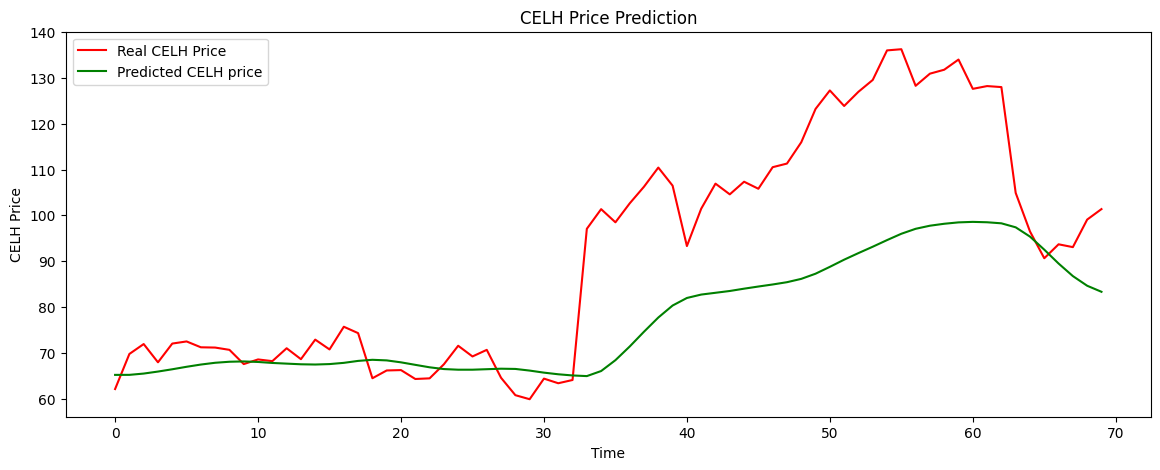

In [57]:
plt.figure(figsize = (14,5))
plt.plot(y_test[78:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[78:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()

In [ ]:
for i in y_pred[1522:]:
  if y_pred[1522:] < 1.2 * y_test[1522:] & y_pred[1522:] > 0.75 * y_test[1522:]:
    print('1')
  else:
    print('0')


TypeError: ignored